In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import pingouin as pg
import plotly.express as px
import seaborn as sns 
from statannot import add_stat_annotation
import os
import copy
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

C:\Users\essie-adm-qizhu\AppData\Roaming\Python\Python38\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.1, the latest is 0.5.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [46]:
path="../../data/raw_data/"

data_raw = []
data_auto = []
data_control = []
data_self = []

data_analysis = pd.DataFrame()

for home, dirs, files in os.walk(path):
    for filename in files:
        t = pd.read_csv(home+"/"+filename,index_col=0)
        t.columns = t.columns.str.replace(' ', '')
        t = t.reset_index()

        t[["participant_id"]] = filename[0:2]
        t[["condition"]] = filename[3:7]
        t[["eventStatusDiff","ExperimentStartedDiff"]] = t[["eventStatus","ExperimentStarted"]].ne(t[["eventStatus","ExperimentStarted"]].shift().bfill()).astype(int) # faster

        # data_light["state_change"] = data_light["light_state"].diff()
        end_time = t[t['eventStatusDiff'] != 0]
        start_time = t[t['ExperimentStartedDiff'] != 0]
        time_period = end_time['WorldTime(seconds)'].values[0] - start_time['WorldTime(seconds)'].values[0]

        condition = t[["condition"]][0:1].values.ravel()[0]
        participant_id = t[["participant_id"]][0:1].values.ravel()[0]

        print(participant_id + condition)        
        data_analysis = data_analysis.append(pd.DataFrame([[condition,participant_id,time_period[0]
                                                            ]],
                                                columns=["condition","participant_id","time_period"
                                                        ]),
                                                ignore_index=True)

01cont


IndexError: invalid index to scalar variable.

In [47]:
time_period

-5

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Using zero_method  pratt
cont v.s. rout: Wilcoxon test (paired samples), P_val=3.804e-01 stat=2.700e+01
Using zero_method  pratt
rout v.s. mini: Wilcoxon test (paired samples), P_val=1.611e-02 stat=9.000e+00
Using zero_method  pratt
mini v.s. glob: Wilcoxon test (paired samples), P_val=3.418e-02 stat=1.200e+01
Using zero_method  pratt
cont v.s. mini: Wilcoxon test (paired samples), P_val=3.394e-01 stat=2.600e+01
Using zero_method  pratt
rout v.s. glob: Wilcoxon test (paired samples), P_val=7.910e-01 stat=3.500e+01
Using zero_method  pratt
cont v.s. glob: Wilcoxon test (paired samples), P_val=1.763e-01 stat=2.100e+01


IndexError: list index out of range

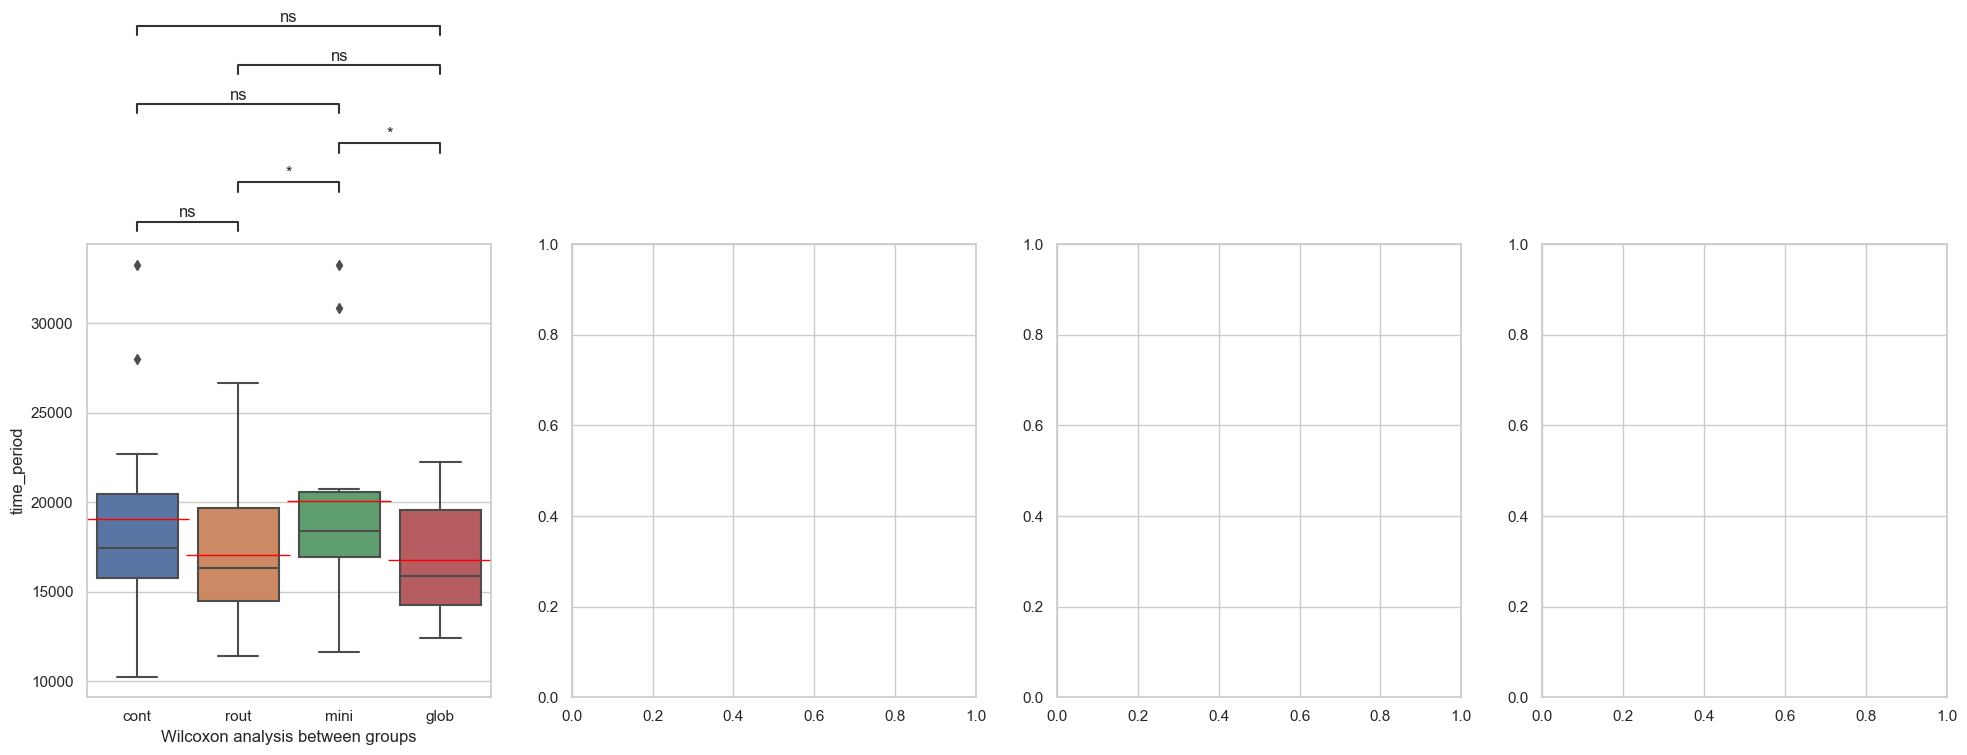

In [39]:
### pair analysis visualization 
sns.set(style = 'whitegrid')
x = 'condition'
y_list = ["time_period"]  

order = ["cont","rout","mini","glob"]
# order = ["auto","self"]
method = 'Wilcoxon'
# method = 'Kruskal'
data = data_analysis
plot_line = 0
box_pairs=[
         (order[0], order[1]),
         (order[0], order[2]),
         (order[0], order[3]),
         (order[1], order[2]),
         (order[1], order[3]),
         (order[2], order[3]),
            ]


fig, axes = plt.subplots(1,4, figsize=(24,6), dpi=100)

y = y_list[0]
axes[0] = sns.boxplot(ax = axes[0], data=data, x=x, y=y, order=order, showmeans=True, meanprops={"marker":"_","markerfacecolor":"white","markeredgecolor":"red","markersize":"75"})
# axes[0] = sns.violinplot(ax = axes[0], data=data, x=x, y=y, order=order)
test_results = add_stat_annotation(ax=axes[0], data=data, x=x, y=y, order=order,
                                 box_pairs=box_pairs,
                                 test=method, 
                                 comparisons_correction=None, 
                                 text_format='star', loc='outside', verbose=1,
                                 # stats_params={'alternative': 'less'}
                                 )
axes[0].set(xlabel = method + ' analysis between groups', ylabel=y)

y = y_list[1]
axes[1] = sns.boxplot(ax = axes[1],data=data, x=x, y=y,order=order, showmeans=True, meanprops={"marker":"_","markerfacecolor":"white","markeredgecolor":"red","markersize":"75"})
test_results = add_stat_annotation(ax=axes[1], data=data, x=x, y=y,order=order,
                                 box_pairs=box_pairs,
                                 test=method, 
                                 comparisons_correction=None, 
                                 text_format='star', loc='outside', verbose=1,
                                 # stats_params={'alternative': 'less'}
                                 )
axes[1].set(xlabel = method + ' analysis between groups', ylabel=y)

y = y_list[2]
axes[2] = sns.boxplot(ax = axes[2],data=data, x=x, y=y,order=order, showmeans=True, meanprops={"marker":"_","markerfacecolor":"white","markeredgecolor":"red","markersize":"75"})
test_results = add_stat_annotation(ax=axes[2], data=data, x=x, y=y,order=order,
                                 box_pairs=box_pairs,
                                 test=method, 
                                 comparisons_correction=None, 
                                 text_format='star', loc='outside', verbose=1,
                                 # stats_params={'alternative': 'less'}
                                 )
axes[2].set(xlabel = method + ' analysis between groups', ylabel=y)

y = y_list[3]
axes[3] = sns.boxplot(ax = axes[3],data=data, x=x, y=y,order=order, showmeans=True, meanprops={"marker":"_","markerfacecolor":"white","markeredgecolor":"red","markersize":"75"})
test_results = add_stat_annotation(ax=axes[3], data=data, x=x, y=y,order=order,
                                 box_pairs=box_pairs,
                                 test=method, 
                                 comparisons_correction=None, 
                                 text_format='star', loc='outside', verbose=1,
                                 # stats_params={'alternative': 'greater'}
                                 )
axes[3].set(xlabel = method + ' analysis between groups', ylabel=y)